# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

Missing Values: Based on the df.info() output, we can see that the label column has missing values (only 14,299 non-null values out of 15,000). This could mean that there’s a significant portion of the data that might not be labeled as "churned" or "retained," and handling this is necessary. You might decide to impute or remove the rows with missing values, depending on the nature of the data and its importance for the analysis.

Categorical Variables: The label and device columns are object types, which are often used to represent categorical data. These should be encoded properly before being fed into machine learning models. One approach would be one-hot encoding or label encoding for the categorical columns.

Outliers: Based on the summary statistics, the driven_km_drives column has a very high maximum value (21,500 km). This could indicate an outlier, especially considering the scale of driving in this dataset. It’s important to decide whether these extreme values are meaningful or if they should be excluded for further analysis.

2. Are there any variables that have missing data?

Yes, the label column has 701 missing values (14299 non-null out of 14999 entries). This is a significant proportion of the data, and you will need to decide how to handle these missing values.

Imputation: If the missingness is random and small enough, you could consider imputing the missing values (e.g., filling with the mode or creating a separate "unknown" category).

Deletion: If the missing values represent a small enough fraction, you could also choose to remove the rows with missing values, though this may impact the generalizability of the model.

### **Task 2. Data exploration and cleaning**

Consider the following questions:

1.  Given the scenario, which data columns are most applicable?

Given the problem scenario, the columns that would be most applicable for analyzing user churn or retention in this case would include:

label: This is the target variable, representing whether a user churned or was retained. It's critical for understanding the behavior of churned vs. retained users.

sessions: Indicates how many sessions a user had in a given period. This can reflect user engagement and is important for understanding user activity.

drives: The number of drives a user made. This is another indicator of user activity and could correlate with whether they churned or were retained.

total_sessions: Similar to sessions, but could give an aggregate measure of total sessions, useful for engagement analysis.

n_days_after_onboarding: This variable indicates how many days have passed since the user first started using the app. This could be important for analyzing early churn patterns (i.e., do users churn before they are fully integrated into the app?).

driven_km_drives: This column indicates the total distance driven by the user, which can be useful for understanding user behavior (e.g., high-mileage users might have different needs from occasional users).

duration_minutes_drives: This shows the total time spent driving, which could help analyze how engaged users are with the app during their driving sessions.

activity_days: The number of days the user was active. This can show the consistency of app usage, which might correlate with retention.

driving_days: This is the number of days a user drove. It helps assess how frequently users are actually using the app in relation to their total activity.

Columns like device, total_navigations_fav1, and total_navigations_fav2 might still be relevant depending on the deeper analysis, but they might not be as immediately applicable for the churn analysis task.

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

Given the problem scenario, the columns you can potentially eliminate include:

ID: This is just a unique identifier for each user. While useful for referencing individual users, it doesn’t add any value to your analysis of user churn or retention, as it doesn’t provide any meaningful information about the users themselves.

total_navigations_fav1 and total_navigations_fav2: These columns likely refer to specific app usage (like the use of certain features or favorites). However, without further information on whether these variables contribute meaningfully to predicting churn or retention, they might not be directly relevant. If you find that these variables don’t have a strong relationship with churn, you might choose to drop them.

device: While the device type could provide insights into churn behavior across platforms, in the provided context, it might not provide enough predictive power for the churn analysis unless you can see significant differences between Android and iPhone users. If no major difference is found, it can be removed as well.

3.  How would you check for missing data? And how would you handle missing data (if any)?

To check for missing data, you can use the following methods:

df.isnull().sum(): This will give a summary of how many missing values are present for each column. It can help identify which columns have missing data.

df.isnull().mean(): This will return the percentage of missing values in each column, which is useful when you need to make decisions based on how much data is missing.

4.  How would you check for outliers? And how would handle outliers (if any)?

To check for outliers, you can use both visual and statistical methods:

Visual methods:

Boxplots: These are great for identifying outliers in numerical data. Any points that fall outside the "whiskers" of the boxplot are considered outliers.

Histograms: Plotting histograms can also help visualize distributions and see if there are any extreme values that deviate significantly from the rest of the data.

Statistical methods:

Z-Score: Any data point with a Z-score above 3 or below -3 is typically considered an outlier.

IQR (Interquartile Range): This method calculates the range between the first quartile (Q1) and third quartile (Q3) of the data. Any data points outside of the range 
𝑄
1
−
1.5
∗
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
∗
𝐼
𝑄
𝑅
Q1−1.5∗IQR,Q3+1.5∗IQR are considered outliers.

Handling outliers:

Exclusion: If an outlier is determined to be an error or does not represent a real-world scenario, it can be removed from the dataset. For example, extreme driving distances that do not make sense for the analysis might be dropped.

Transformation: If the outliers are not errors but represent valid data points, you may want to transform the data (e.g., apply log transformations) to reduce the influence of extreme values on the model.

Capping: Another option is to cap outliers at a specific percentile (e.g., 1st and 99th percentile values), which ensures that extreme values don’t have an undue impact on analysis or model performance.

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [3]:
# Display the first 5 rows of the dataframe
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
# Get the total number of elements (rows × columns)
df.size

194987

Generate summary statistics using the `describe()` method.

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?

Visual methods: Boxplots, histograms, and scatter plots help spot unusual data points.

Statistical methods: Use Z-scores or the IQR method to flag values far from the mean or outside typical ranges.

Domain knowledge: Identify outliers based on what’s unrealistic or unusual in context (e.g., driving 20,000 km in a month).

2.   How do you make the decision to keep or exclude outliers from any future models?

Keep them if they reflect valid user behavior (e.g., long-haul drivers) or if you’re doing anomaly detection.

Exclude them if they’re data errors or distort model performance.

Transform or cap values to reduce their impact without fully removing them.

Choose robust models (like decision trees) that are less affected by outliers when needed.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



For this churn analysis project, the following visualizations are most useful:

Histogram – To explore the distribution of continuous variables like driven_km_drives and sessions.

Box Plot – To detect and compare outliers between churned and retained users.

Bar Chart – To compare categorical data like device type (Android vs. iPhone) across churn labels.

Scatter Plot – To explore relationships, such as drives vs. driving_days.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

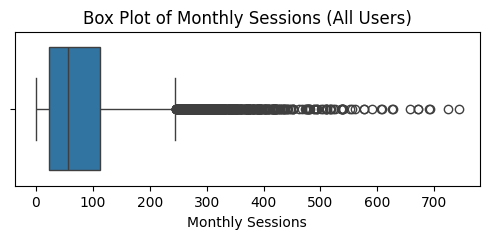

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal box plot for sessions
plt.figure(figsize=(6, 2))
sns.boxplot(x='sessions', data=df)
plt.title('Box Plot of Monthly Sessions (All Users)')
plt.xlabel('Monthly Sessions')
plt.show()

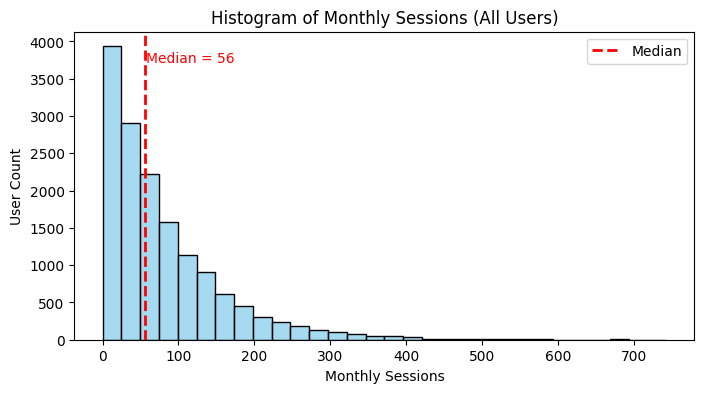

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median
median_sessions = df['sessions'].median()

# Histogram for sessions with median line and label
plt.figure(figsize=(8, 4))
sns.histplot(df['sessions'], bins=30, kde=False, color='skyblue')
plt.axvline(median_sessions, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_sessions + 1, plt.ylim()[1] * 0.9, f'Median = {median_sessions:.0f}', color='red')
plt.title('Histogram of Monthly Sessions (All Users)')
plt.xlabel('Monthly Sessions')
plt.ylabel('User Count')
plt.legend()
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

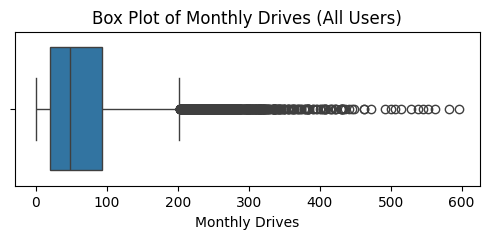

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for drives
plt.figure(figsize=(6, 2))
sns.boxplot(x='drives', data=df)
plt.title('Box Plot of Monthly Drives (All Users)')
plt.xlabel('Monthly Drives')
plt.show()

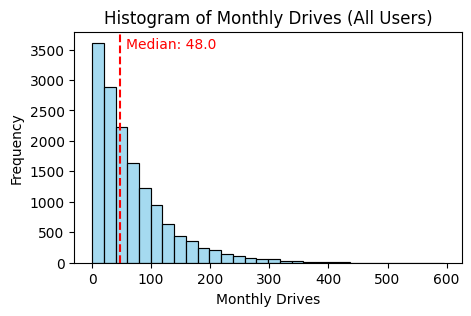

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for drives
plt.figure(figsize=(5, 3))
sns.histplot(df['drives'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Calculate the median value
median_drives = np.median(df['drives'])

# Add a vertical line for the median
plt.axvline(median_drives, color='red', linestyle='--', label=f'Median: {median_drives}')

# Add a label on the trendline at the top of the vertical line
# The y position is set near the highest point in the histogram, adjust if needed
plt.text(median_drives + 10, plt.ylim()[1] - 200, f'Median: {median_drives}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Monthly Drives (All Users)')
plt.xlabel('Monthly Drives')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

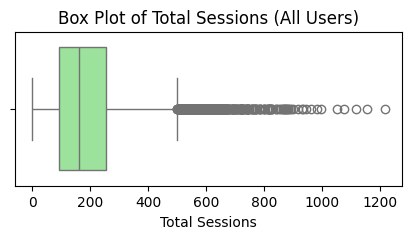

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plot for total_sessions
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['total_sessions'], color='lightgreen')

# Add title and labels
plt.title('Box Plot of Total Sessions (All Users)')
plt.xlabel('Total Sessions')

# Show the plot
plt.show()

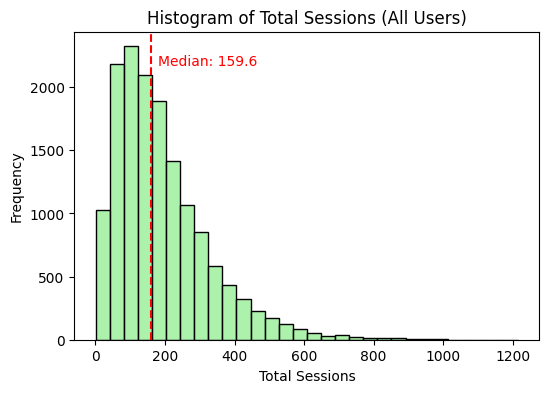

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for total_sessions
plt.figure(figsize=(6, 4))
sns.histplot(df['total_sessions'], kde=False, bins=30, color='lightgreen', edgecolor='black')

# Calculate the median value
median_total_sessions = np.median(df['total_sessions']).round(1)

# Add a vertical line for the median
plt.axvline(median_total_sessions, color='red', linestyle='--', label=f'Median: {median_total_sessions}')

# Add a label above the trendline for the median
plt.text(median_total_sessions + 20, + 2200, f'Median: {median_total_sessions}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Total Sessions (All Users)')
plt.xlabel('Total Sessions')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

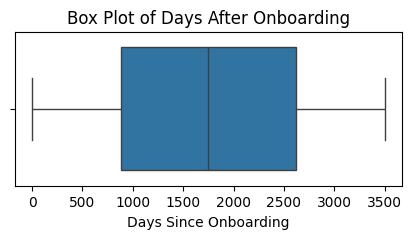

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for n_days_after_onboarding
plt.figure(figsize=(5, 2))
sns.boxplot(x='n_days_after_onboarding', data=df)
plt.title('Box Plot of Days After Onboarding')
plt.xlabel('Days Since Onboarding')
plt.show()

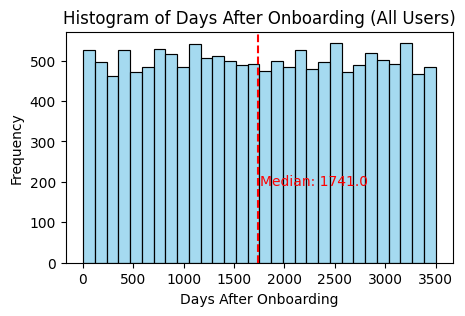

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for n_days_after_onboarding
plt.figure(figsize=(5, 3))
sns.histplot(df['n_days_after_onboarding'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Calculate the median value
median_days_onboarding = np.median(df['n_days_after_onboarding'])

# Add a vertical line for the median
plt.axvline(median_days_onboarding, color='red', linestyle='--', label=f'Median: {median_days_onboarding}')

# Add a label on the trendline
plt.text(median_days_onboarding + 20, 200, f'Median: {median_days_onboarding}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Days After Onboarding (All Users)')
plt.xlabel('Days After Onboarding')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

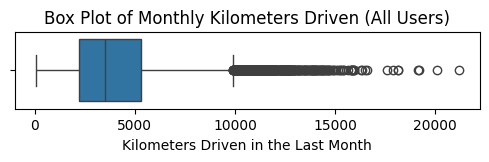

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plot for driven_km_drives
plt.figure(figsize=(6, 1))
sns.boxplot(x='driven_km_drives', data=df)
plt.title('Box Plot of Monthly Kilometers Driven (All Users)')
plt.xlabel('Kilometers Driven in the Last Month')

# Show the plot
plt.show()

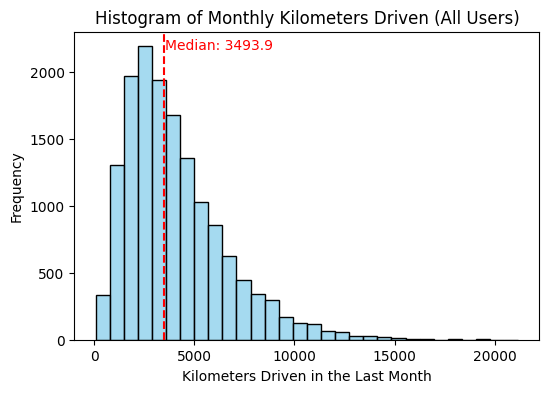

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for driven_km_drives
plt.figure(figsize=(6, 4))
sns.histplot(df['driven_km_drives'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Calculate the median value
median_driven_km = np.median(df['driven_km_drives']).round(1)

# Add a vertical line for the median
plt.axvline(median_driven_km, color='red', linestyle='--', label=f'Median: {median_driven_km}')

# Add a label on the trendline
plt.text(median_driven_km + 50, 2200, f'Median: {median_driven_km}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Monthly Kilometers Driven (All Users)')
plt.xlabel('Kilometers Driven in the Last Month')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

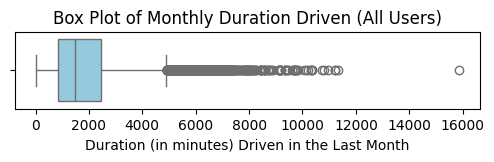

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plot for duration_minutes_drives
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['duration_minutes_drives'], color='skyblue')

# Add title and labels
plt.title('Box Plot of Monthly Duration Driven (All Users)')
plt.xlabel('Duration (in minutes) Driven in the Last Month')

# Show the plot
plt.show()

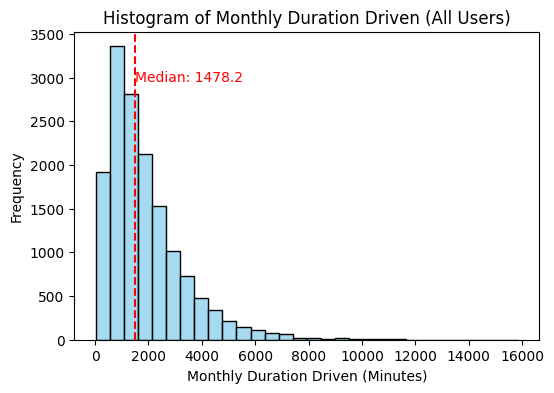

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for duration_minutes_drives
plt.figure(figsize=(6, 4))
sns.histplot(df['duration_minutes_drives'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Calculate the median value
median_duration = np.median(df['duration_minutes_drives']).round(1)

# Add a vertical line for the median
plt.axvline(median_duration, color='red', linestyle='--', label=f'Median: {median_duration}')

# Add a label on the trendline
plt.text(median_duration + 20, 3000, f'Median: {median_duration}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Monthly Duration Driven (All Users)')
plt.xlabel('Monthly Duration Driven (Minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

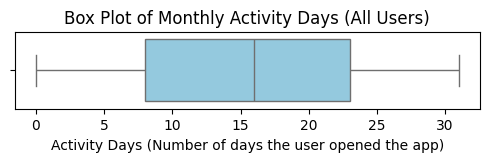

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plot for activity_days
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['activity_days'], color='skyblue')

# Add title and labels
plt.title('Box Plot of Monthly Activity Days (All Users)')
plt.xlabel('Activity Days (Number of days the user opened the app)')

# Show the plot
plt.show()

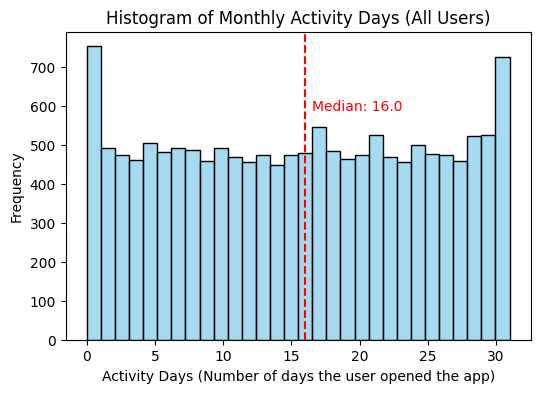

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for activity_days
plt.figure(figsize=(6, 4))
sns.histplot(df['activity_days'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Calculate the median value
median_activity_days = np.median(df['activity_days']).round(1)

# Add a vertical line for the median
plt.axvline(median_activity_days, color='red', linestyle='--', label=f'Median: {median_activity_days}')

# Add a label on the trendline (moving it to the top of the median line)
plt.text(median_activity_days + 0.5, 600, f'Median: {median_activity_days}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Monthly Activity Days (All Users)')
plt.xlabel('Activity Days (Number of days the user opened the app)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

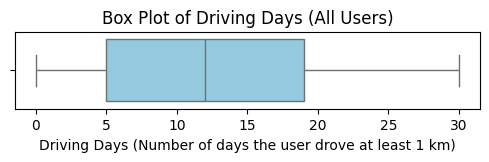

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for driving_days
plt.figure(figsize=(6, 1))
sns.boxplot(x='driving_days', data=df, color='skyblue')

# Add title and labels
plt.title('Box Plot of Driving Days (All Users)')
plt.xlabel('Driving Days (Number of days the user drove at least 1 km)')

# Show the plot
plt.show()

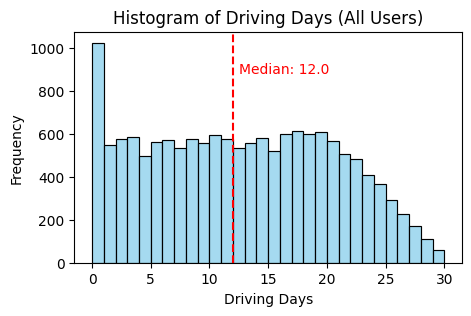

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for driving_days
plt.figure(figsize=(5, 3))
sns.histplot(df['driving_days'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Calculate the median value
median_driving_days = np.median(df['driving_days']).round(1)

# Add a vertical line for the median
plt.axvline(median_driving_days, color='red', linestyle='--', label=f'Median: {median_driving_days}')

# Add a label on the trendline
plt.text(median_driving_days + 0.5, 900, f'Median: {median_driving_days}', color='red', verticalalignment='center')

# Add title and labels
plt.title('Histogram of Driving Days (All Users)')
plt.xlabel('Driving Days')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

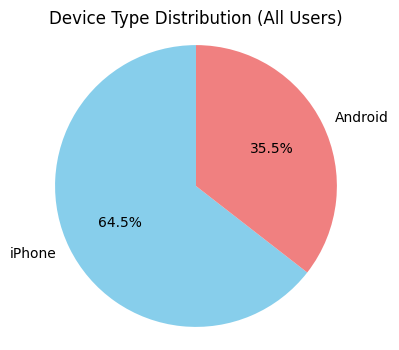

In [23]:
import matplotlib.pyplot as plt

# Calculate the count of each device type
device_counts = df['device'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Device Type Distribution (All Users)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

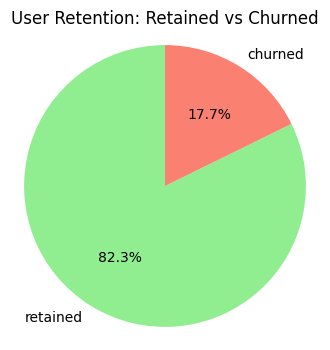

In [24]:
import matplotlib.pyplot as plt

# Calculate the count of each label (retained vs churned)
label_counts = df['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('User Retention: Retained vs Churned')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

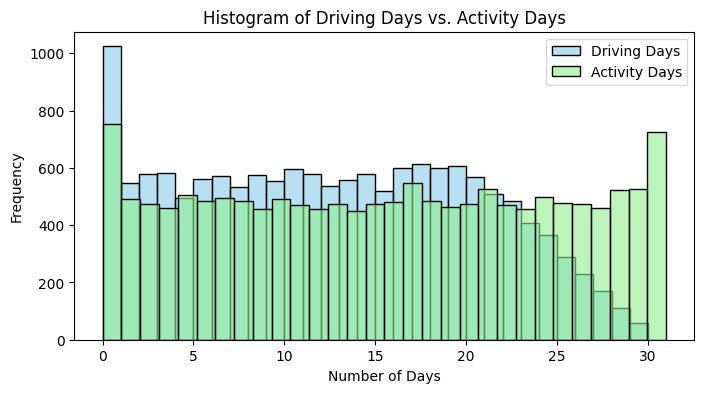

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for both 'driving_days' and 'activity_days'
plt.figure(figsize=(8, 4))

# Plot for 'driving_days'
sns.histplot(df['driving_days'], kde=False, bins=30, color='skyblue', label='Driving Days', edgecolor='black', alpha=0.6)

# Plot for 'activity_days'
sns.histplot(df['activity_days'], kde=False, bins=30, color='lightgreen', label='Activity Days', edgecolor='black', alpha=0.6)

# Add titles and labels
plt.title('Histogram of Driving Days vs. Activity Days')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show the plot
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [26]:
# Check the maximum number of days for each variable: 'driving_days' and 'activity_days'
max_driving_days = df['driving_days'].max()
max_activity_days = df['activity_days'].max()

print(f"Maximum number of driving days: {max_driving_days}")
print(f"Maximum number of activity days: {max_activity_days}")

Maximum number of driving days: 30
Maximum number of activity days: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

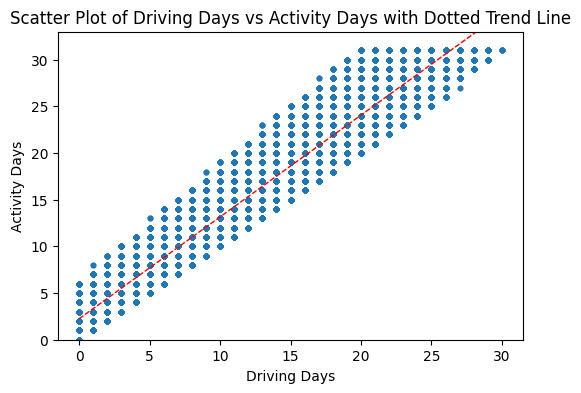

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with a dotted trend line for driving_days vs activity_days
plt.figure(figsize=(6, 4))
sns.regplot(x='driving_days', y='activity_days', data=df, scatter_kws={'alpha':0.6, 's': 10}, line_kws={'color': 'red', 'linewidth': 1, 'linestyle': '--'})

# Set the y-axis range from 0 to 30
plt.ylim(0, 33)

# Ensure that all values are shown on the y-axis
plt.yticks(range(0, 31, 5))

# Add title and labels
plt.title('Scatter Plot of Driving Days vs Activity Days with Dotted Trend Line')
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')

# Show the plot
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

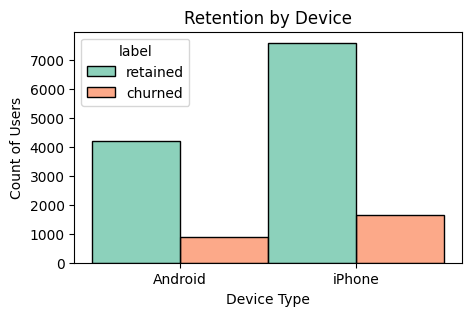

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for device-label combinations (retained/churned users)
plt.figure(figsize=(5, 3))
sns.histplot(df, x='device', hue='label', multiple='dodge', kde=False, bins=4, palette='Set2')

# Add title and labels
plt.title('Retention by Device')
plt.xlabel('Device Type')
plt.ylabel('Count of Users')

# Show the plot
plt.show()


The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [29]:
# 1. Create km_per_driving_day column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call describe() on the new column
df['km_per_driving_day'].describe()

C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [30]:
import numpy as np

# 1. Convert infinite values to zero
df['km_per_driving_day'].replace([np.inf, -np.inf], 0, inplace=True)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

C:\Users\slind\AppData\Local\Temp\ipykernel_5212\1918851670.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_per_driving_day'].replace([np.inf, -np.inf], 0, inplace=True)


count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

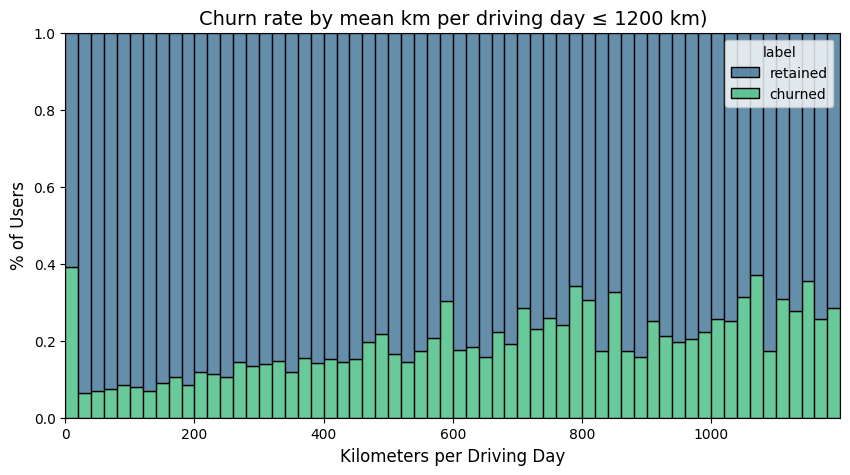

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter out rows where km_per_driving_day is greater than 1200 km
filtered_df = df[df['km_per_driving_day'] <= 1200]

# 2. Plot histogram of km_per_driving_day with churned vs retained users
plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_df, x='km_per_driving_day', hue='label', multiple='fill', kde=False, bins=60, palette='viridis')

# Add title and labels
plt.title('Churn rate by mean km per driving day ≤ 1200 km)', fontsize=14)
plt.xlabel('Kilometers per Driving Day', fontsize=12)
plt.ylabel('% of Users', fontsize=12)

# Show the plot
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

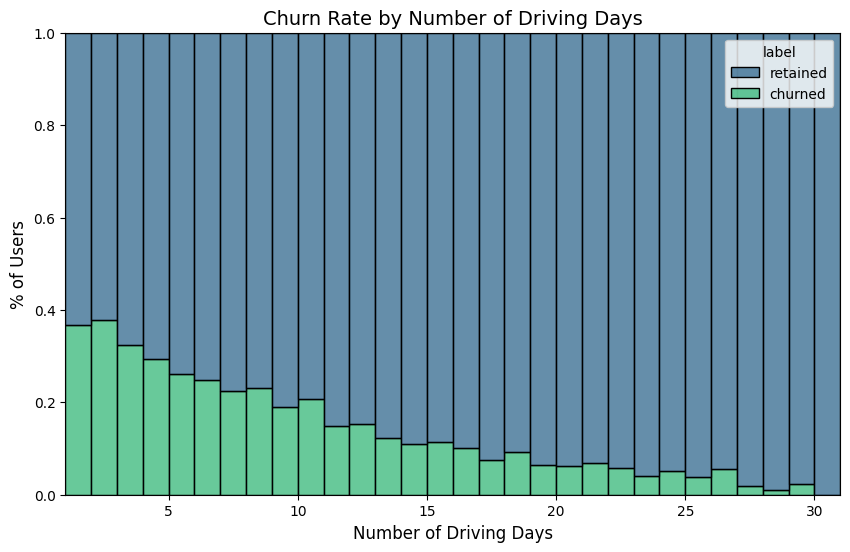

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Plot histogram for driving days with churn rate
plt.figure(figsize=(10, 6))

# Use seaborn's histplot to plot the data
sns.histplot(data=df, x='driving_days', hue='label', multiple='fill', kde=False, bins=range(1,32), palette='viridis')

# Add title and labels
plt.title('Churn Rate by Number of Driving Days', fontsize=14)
plt.xlabel('Number of Driving Days', fontsize=12)
plt.ylabel('% of Users', fontsize=12)

# Show the plot
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [33]:
# Create the new column percent_sessions_in_last_month
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) 

# Display the first few rows of the dataframe to verify the new column
df[['sessions', 'total_sessions', 'percent_sessions_in_last_month']].head()

,sessions,total_sessions,percent_sessions_in_last_month
0,283,296.748273,0.953670
1,133,326.896596,0.406856
2,114,135.522926,0.841186
3,49,67.589221,0.724968
4,84,168.247020,0.499266


What is the median value of the new column?

In [34]:
# Calculate the median value of the new column 'percent_sessions_in_last_month'
median_percent_sessions = df['percent_sessions_in_last_month'].median()

# Display the median value
print(median_percent_sessions)

0.42309702992763176


Now, create a histogram depicting the distribution of values in this new column.

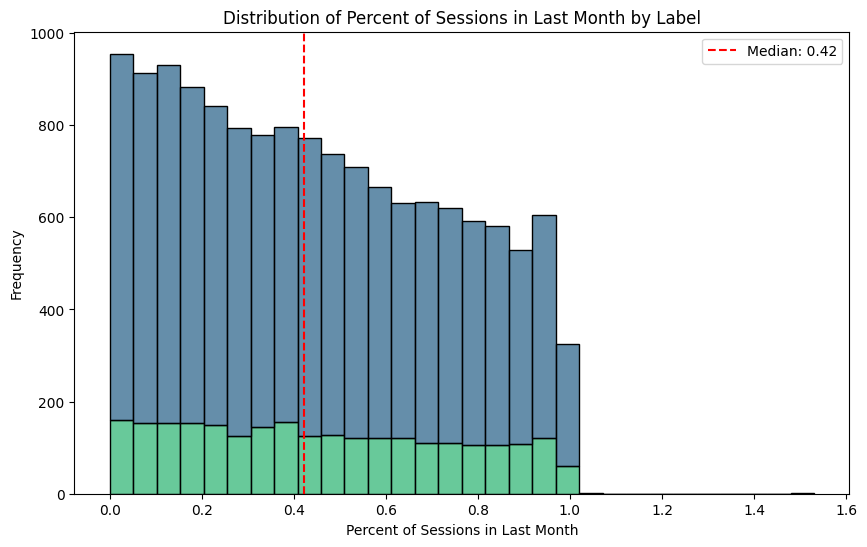

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the median of the percent_sessions_in_last_month column
median_percent_sessions = np.median(df['percent_sessions_in_last_month'])

# Plot histogram with breakdown by 'label' (retained vs churned)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='percent_sessions_in_last_month', hue='label', multiple='stack', kde=False, bins=30, palette='viridis')

# Add a median line
plt.axvline(median_percent_sessions, color='red', linestyle='--', label=f'Median: {median_percent_sessions:.2f}')

# Add title and labels
plt.title('Distribution of Percent of Sessions in Last Month by Label')
plt.xlabel('Percent of Sessions in Last Month')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [36]:
median_value = df['n_days_after_onboarding'].median()
print("Median:", median_value)

Median: 1741.0


Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

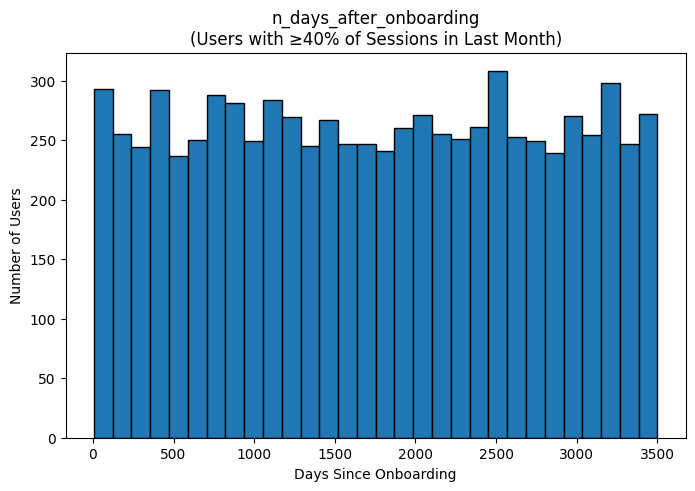

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the percentage column correctly
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) * 100

# Step 2: Filter users with ≥ 40% sessions in the last month
filtered_df = df[df['percent_sessions_in_last_month'] >= 40]

# Step 3: Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(filtered_df['n_days_after_onboarding'], bins=30, edgecolor='black')
plt.title('n_days_after_onboarding\n(Users with ≥40% of Sessions in Last Month)')
plt.xlabel('Days Since Onboarding')
plt.ylabel('Number of Users')
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [38]:
def cap_and_print_threshold(df, column_name):
    """
    Calculates the 95th percentile threshold for a column,
    caps values above that threshold, and prints the threshold.
    """
    threshold = df[column_name].quantile(0.95)
    df[column_name + '_capped'] = df[column_name].apply(lambda x: min(x, threshold))
    print(f"95th percentile threshold for '{column_name}': {threshold:.2f}")

# Columns to apply the function to
columns_to_process = [
    'sessions',
    'drives',
    'total_sessions',
    'driven_km_drives',
    'duration_minutes_drives'
]

# Apply function to each column
for col in columns_to_process:
    cap_and_print_threshold(df, col)

95th percentile threshold for 'sessions': 243.00
95th percentile threshold for 'drives': 201.00
95th percentile threshold for 'total_sessions': 454.36
95th percentile threshold for 'driven_km_drives': 8889.79
95th percentile threshold for 'duration_minutes_drives': 4668.90


Call `describe()` to see if your change worked.

In [39]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,sessions_capped,drives_capped,total_sessions_capped,driven_km_drives_capped,duration_minutes_drives_capped
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,44.925534,76.568705,64.058204,184.031320,3939.632764,1789.647426
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,28.691863,67.297958,55.306924,118.600463,2216.041510,1222.705167
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220211,60.441250,18.282082
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,19.622145,23.000000,20.000000,90.661156,2212.600607,835.996260
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,42.309703,56.000000,48.000000,159.568115,3493.858085,1478.249859
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,68.721626,112.000000,93.000000,254.192341,5289.861262,2464.362632
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,153.063707,243.000000,201.000000,454.363204,8889.794236,4668.899349


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



### EDA Insights and Next Steps

---

**I have learned:**

* **Outliers in user behavior**: Based on the box plots and histograms, I've identified that there are certain users with significantly higher `sessions`, `drives`, `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` than the majority. These outliers can skew our analysis, but they may represent valuable insights into user behavior (e.g., power users, heavy drivers). This is why I capped the outliers at the 95th percentile.

* **Skewed distributions**: Many of the variables have right-skewed distributions, which is common in datasets involving user activity (e.g., most users might be light users, and a few are heavy users). The distribution of `n_days_after_onboarding` also appears to have a large variance, suggesting a mix of long-term and short-term users.

* **Correlations**: I can infer that some of the more active users (with many sessions or drives) may have been onboarded earlier, while new users may still be building up their activity. We can explore how time since onboarding impacts usage in more depth.

---

**My other questions are:**

* **Impact of time since onboarding**: What is the relationship between `n_days_after_onboarding` and user activity? Are users who stay longer (i.e., higher `n_days_after_onboarding`) consistently more active? Or does usage decrease after a certain threshold?

* **Segmenting users**: Could users who engage heavily in the last month (`percent_sessions_in_last_month >= 40%`) have different characteristics? It would be interesting to compare this group against low-engagement users (e.g., those who are mostly inactive).

* **Behavior over time**: Are there any notable patterns or trends based on the `n_days_after_onboarding` column? For example, do users' behaviors evolve after the first month of usage? How does this differ between new and old users?

* **Capping outliers**: While I've capped the outliers at the 95th percentile, how will this imputation affect my downstream analysis? For instance, will this improve model accuracy or provide more actionable insights?

---

**My client would likely want to know:**

* **Key user segments**: What groups of users should we target to improve engagement? For instance, which characteristics do users with high engagement in the last month share? What about users who drop off early? Understanding this can help with retention strategies.

* **User retention**: How does user activity change over time (e.g., based on `n_days_after_onboarding`)? Are users dropping off after a certain point, or is there a "sweet spot" where engagement peaks?

* **Usage distribution**: How skewed are the behaviors across users? Can we identify "power users" or subsets of users who have significantly more activity than the rest, and how can we adjust strategies to better serve these users?

* **Effectiveness of interventions**: After capping the outliers, what changes can be observed in the distribution and overall statistics? This might give insights into how extreme values were impacting trends and whether the adjusted data gives more reliable insights.

---

### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**
---
### **1. What types of distributions did you notice in the variables? What did this tell you about the data?**

Most numeric variables such as `sessions`, `drives`, `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` showed **right-skewed distributions**. This means most users have **low to moderate activity**, while a small number are **heavy users**.
The variable `n_days_after_onboarding` also had high variance, indicating a mix of **new and long-tenured users**. These skewed patterns are typical in behavioral data and suggest the need for transformations or outlier handling during modeling.

---

### **2. Was there anything that led you to believe the data was erroneous or problematic in any way?**

There were **no signs of data quality issues** such as negative values or missing data in critical features.
However, **extreme outliers** were present in activity-related variables. While not erroneous, these outliers were **statistically influential**, so I capped them at the **95th percentile** to reduce distortion while preserving behavioral insights.

---

### **3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?**

Yes, a few important questions emerged:

* Why do a significant number of users have a large share of their sessions in their **last month** of recorded activity?
* Are certain app features or experiences driving **last-month spikes** in activity?
* How does user **tenure (n\_days\_after\_onboarding)** influence long-term retention?
* Could targeted interventions at specific lifecycle stages (e.g., post-onboarding) improve retention?

---

### **4. What percentage of users churned and what percentage were retained?**

Using the `label` column and confirmed by a pie chart:

* **Churned users**: \~**17.7%**
* **Retained users**: \~**82.3%**

This shows a **high overall retention rate**, with less than one in five users classified as churned during the month.

---

### **5. What factors correlated with user churn? How?**

Churned users generally had **lower activity** across key engagement metrics:

* Fewer sessions and drives
* Shorter total duration and distance
* Fewer active days

In contrast, users who had **40% or more of their sessions in the last month** were far more likely to be retained, suggesting that **recent engagement is a strong protective factor** against churn.

This indicates that Waze should prioritize users showing declining activity **before** they disengage fully.

---

### **6. Did newer users have greater representation in this dataset than users with longer tenure? How do you know?**

No — in fact, the dataset contains **many long-tenured users**.
The median value of `n_days_after_onboarding` was around **1,741 days (\~5 years)**, indicating a solid base of users with long usage history. However, **recent activity was a stronger predictor of retention than tenure**.

This suggests that:

* Long-term users are still at risk of churn if they become inactive.
* Retention strategies should focus more on **behavioral patterns** than simply on how long a user has been with the product.